In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
X = pd.read_csv('../data/processed/X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)
X = X.drop('domestic_gross', axis=1)
#X = X.drop('gross', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)

In [13]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [14]:
pd.DataFrame.equals(X_train,X2_train)

True

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.018e+18, tolerance: 1.169e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+18, tolerance: 1.172e+16
  model = cd_fast.enet_coordinate_descent(


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+18, tolerance: 1.166e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.863e+18, tolerance: 1.157e+16
  model = cd_fast.enet_coordinate_descent(


array([ 0.72259915,  0.71220491,  0.70582829,  0.67010036, -0.79338072])

In [16]:
scores.mean()

0.4034703987675451

In [17]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e+17, tolerance: 9.026e+15
  model = cd_fast.enet_coordinate_descent(


0.8157761038484621

<span style="font-size:larger;">**SELECCIÓN DE MODELOS**</span>

Overfitting o Underfitting

In [18]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.018e+18, tolerance: 1.169e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+18, tolerance: 1.172e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

{'fit_time': array([0.00899553, 0.0945859 , 0.08494639, 0.08494735, 0.09394145]),
 'score_time': array([0.00299621, 0.00199842, 0.00199938, 0.00299859, 0.00199819]),
 'test_score': array([ 0.72259915,  0.71220491,  0.70582829,  0.67010036, -0.79338072]),
 'train_score': array([0.76432052, 0.85920444, 0.85774964, 0.85284918, 0.8552399 ])}

Es una ALERTA que se registren test score negativos. Se debe revisar si hay valores negativos en el DataFrame, una diferencia de escala desproporcionada o uso de métricas inadecuadas. 

In [19]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8378727352779494
0.4034703987675451


Hay una gran diferencia entre los dos score, por lo que existe un sesgo. (bias) Underfitting: (Bias Alto) ---> Modelo simple

<span style="font-size:larger;">**VALIDATION CURVES AND LEARNING CURVES**</span>

In [20]:
from sklearn.neighbors import KNeighborsRegressor
cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.02298427, 0.01399469, 0.01399159, 0.01199126, 0.01498699]),
 'score_time': array([0.01299238, 0.00899434, 0.01199365, 0.00899434, 0.00699973]),
 'test_score': array([0.56530426, 0.69522532, 0.72314121, 0.77730954, 0.58129649])}

In [21]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.01499081, 0.01298952, 0.01299357, 0.0159874 , 0.01698399]),
 'score_time': array([0.01698852, 0.01399493, 0.02598143, 0.01599073, 0.00899458]),
 'test_score': array([0.48345033, 0.76716896, 0.72714732, 0.721596  , 0.58117702])}

In [22]:
n=np.arange(22,50,2)

KNeighborsRegressor es un modelo de regresión en scikit-learn que se basa en el algoritmo de k vecinos más cercanos (k-Nearest Neighbors, k-NN). Este modelo se utiliza para realizar predicciones de regresión basadas en la proximidad de los puntos en el espacio de características. (el hiperparámetro indica la cantidad de vecinos más cercanos que se deben considerar al realizar una predicción)

In [23]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),   # Modelo a evaluar (KNeighborsRegressor en este caso)
    X,                        # Conjunto de datos de características
    y,                        # Conjunto de datos de etiquetas
    param_name='n_neighbors',  # Hiperparámetro que se va a variar (n_neighbors en este caso)
    param_range=n,            # Rango de valores para el hiperparámetro
    cv=5                       # Número de pliegues en la validación cruzada
)

In [25]:
np.mean(train_scores, axis=1).shape

(14,)

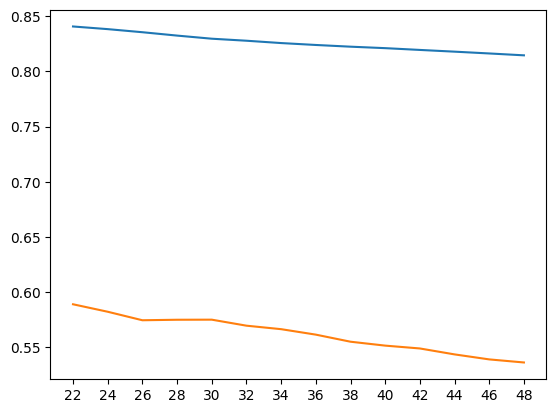

In [28]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(14),n);

En este caso estamos evidenciando que, loa cantidad de vecinos que más nos beneficia, es cuando tenemos 22.

Lasso() cuenta con un parámetro alpha=1.0, que cada vez que lo aumentamos simplificamos el modelo, pero entre más lo reducimos lo complejizamos. (El experto en ML los puede modificar/diseñar por lo que son (hiperparámetros o metaparámetros))

<span style="font-size:larger;">**LEARNING CURVES**</span>

In [29]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=22),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

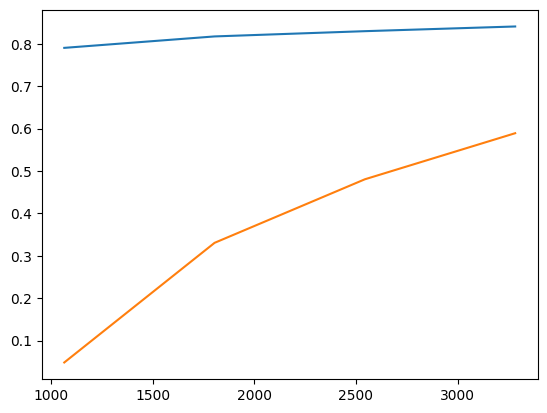

In [30]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])
# El primer valor de la curva suele ser muy errado por lo que al graficarlo puede distorsionar las escalas de la grafica. 
#Lo recomendable es omitir este primer valor

Podemos evidenciar en la gráfica que efectivamente el modelo ha ido aprenmndiendo a medida que se le aumentan los datos, pero que no ha terminado, es decir que aún le queda por aprender, ya que la curva debe de llagar a una asintota pero no es el caso. Aún así, ya no contamos con más datos para agregar al modelo. 

Se podría edcir que este algoritmo resuelve casi todos los casos, pero cae con muchísima facilidad en la maldición de la dimensionalidad, exigiendo una alta cantidad de datos. 